# Bike Sharing Case Study

## Table of Contents
1. [Business Goal](#business-goal)
2. [Data Understanding](#data-understanding)\
    2.1. [Importing Libraries](#importing-libraries)\
    2.2. [Data Loading](#data-loading)\
    2.3. [Data Visualization](#data-visualization)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Data Preparation](#data-preparation)
5. [Model Preparation](#model-preparation)\
    5.1. [Model 1](#model-1)\
    5.2. [Model 2](#model-2)\
    5.3. [Model 3](#model-3)\
    5.4. [Model 4](#model-4)\
    5.5. [Model 5](#model-5)\
    5.6. [Model 6](#model-6)\
    5.7. [Model 7](#model-7)
6. [Residual Analysis](#residual-analysis)
7. [Predictions And Evaluations on Test](#predictions-and-evaluation-on-test-set)

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Data Understanding

### Importing Libraries

In [130]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [132]:
bikesharing=pd.read_csv('day.csv')
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [133]:
bikesharing.shape
bikesharing.info()
bikesharing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping variables which are not used - 'casual' & 'Registered'

In [134]:
bikesharing=bikesharing.drop('casual', axis=1)
bikesharing=bikesharing.drop('registered', axis=1)
bikesharing=bikesharing.drop('instant', axis=1)
bikesharing=bikesharing.drop('dteday', axis=1)
bikesharing.shape

(730, 12)

### Data Visualization

In [135]:
bikesharing['yr']=bikesharing['yr'].map({0:2018, 1:2019})
bikesharing['mnth'] = bikesharing['mnth'].map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
bikesharing['weekday'] = bikesharing['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
bikesharing['weathersit']=bikesharing['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
bikesharing['season']=bikesharing['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [136]:
# renaming few columns for better readibility

bikesharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
bikesharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [137]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Exploratory Data Analysis

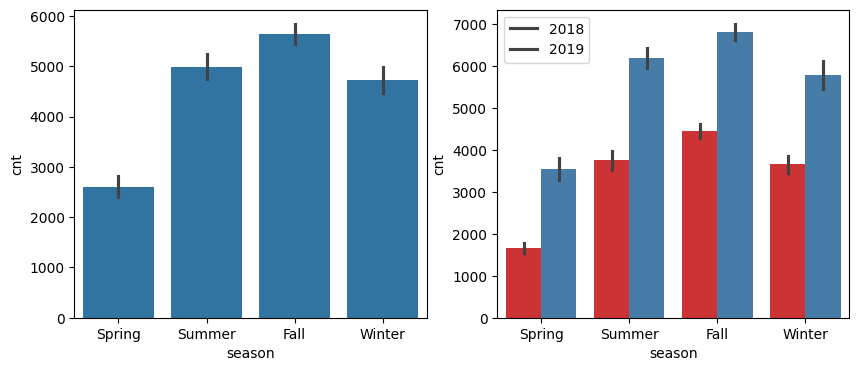

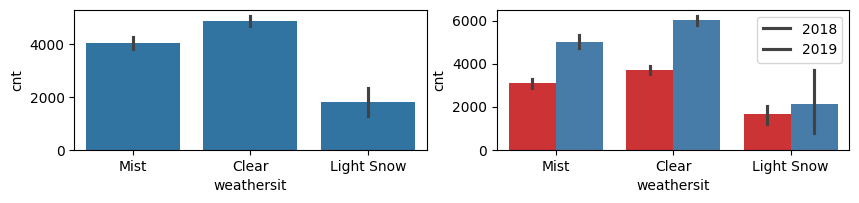

In [138]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data=bikesharing, x='season',y='cnt')
plt.subplot(1,2,2)
sns.barplot(data=bikesharing, x='season',y='cnt', hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
sns.barplot(data=bikesharing, x='weathersit',y='cnt')
plt.subplot(2,2,2)
sns.barplot(data=bikesharing, x='weathersit',y='cnt', hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

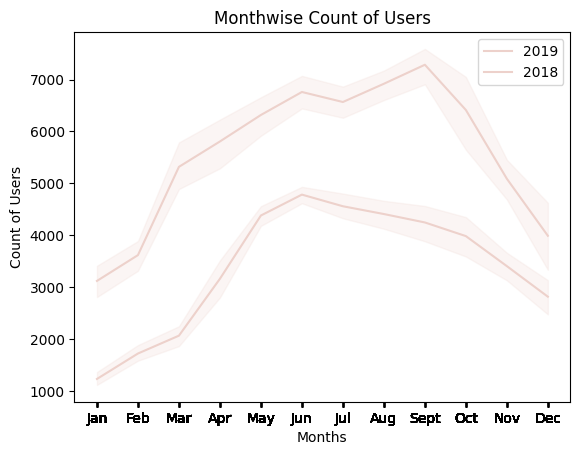

In [139]:
bikesharing_2018=bikesharing[bikesharing['year']==2018]
bikesharing_2019=bikesharing[bikesharing['year']==2019]
data_2019=sns.lineplot(data=bikesharing_2019, x='month', y='cnt', hue='year')
data_2019.set(xticks=bikesharing_2019.month.values)
data_2018=sns.lineplot(data=bikesharing_2018, x='month', y='cnt', hue='year')
data_2018.set(xticks=bikesharing_2018.month.values)
plt.xlabel('Months')
plt.ylabel('Count of Users')
plt.title('Monthwise Count of Users')
plt.legend()
plt.show()

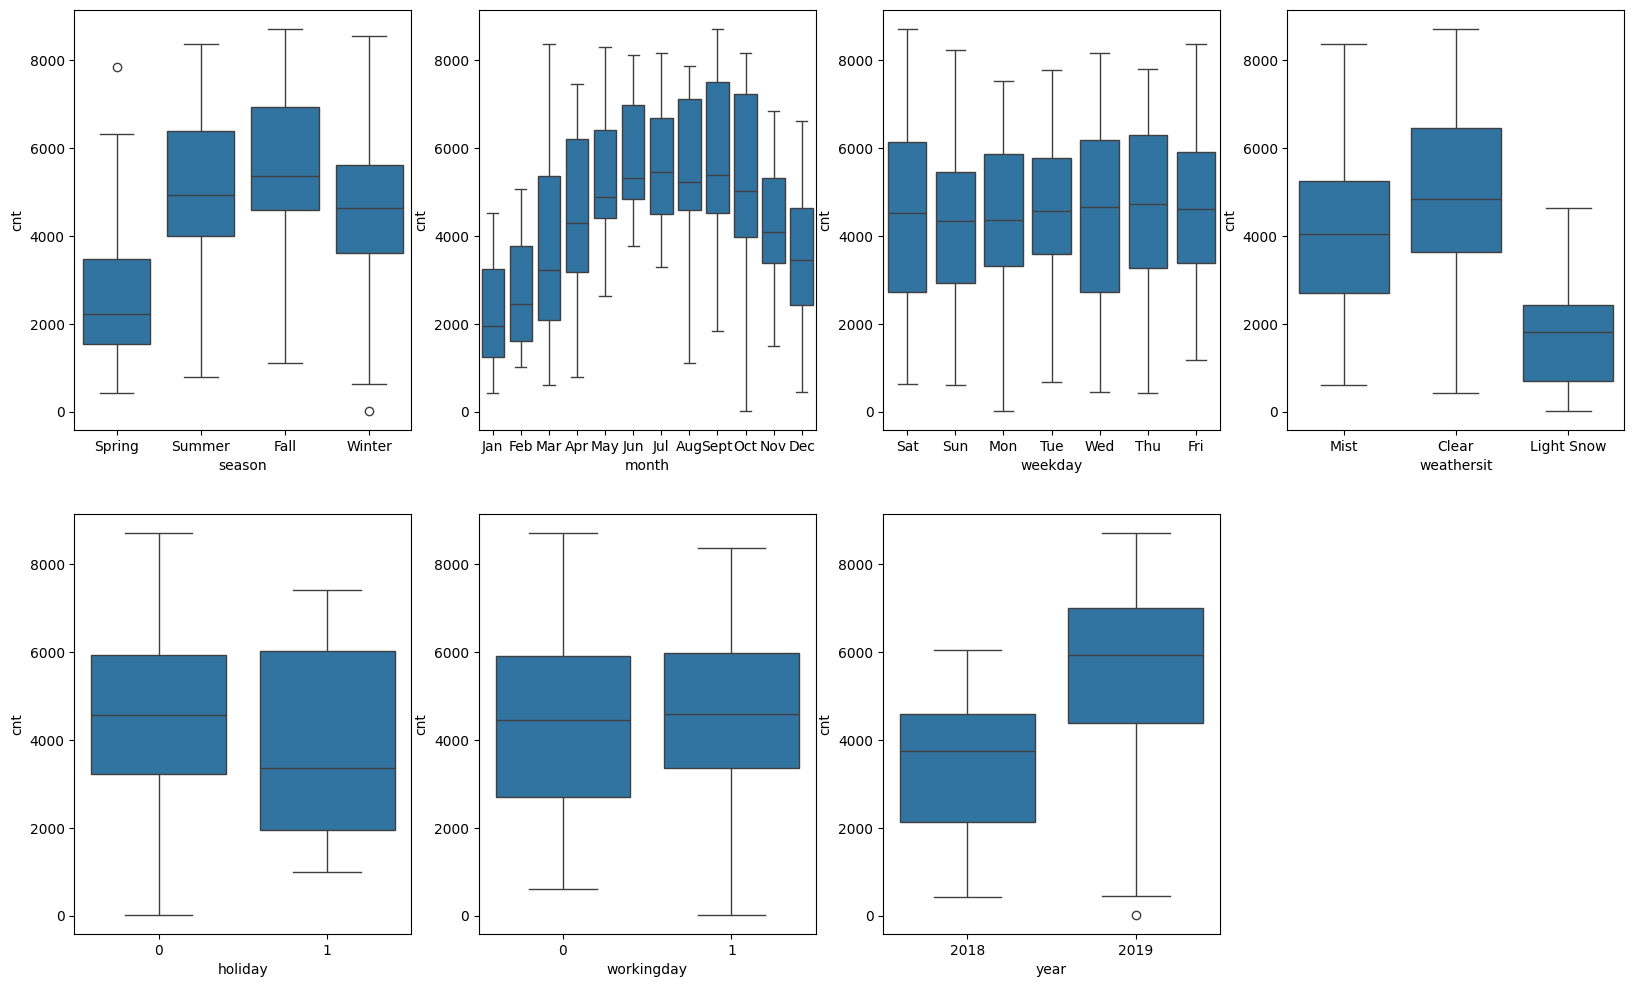

In [140]:
# Analysing/visualizing the categorical columns with boxplot
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bikesharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bikesharing)
plt.show()

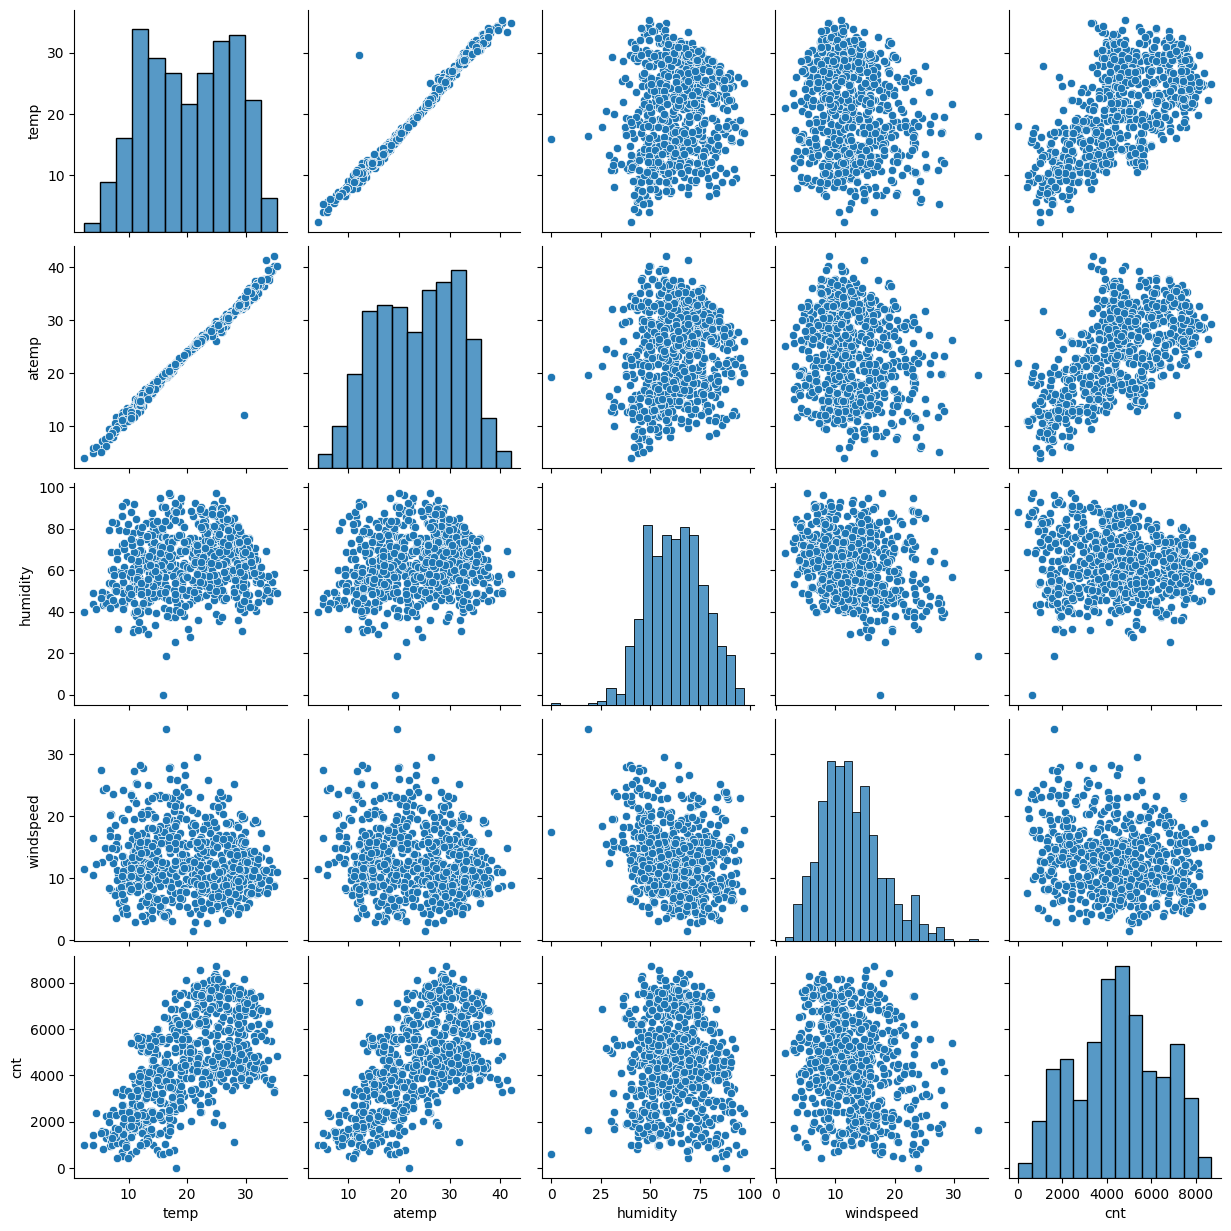

In [141]:
sns.pairplot(bikesharing,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

## Data Preparation

## Adding Dummies

In [142]:
season = pd.get_dummies(bikesharing['season']).astype(int)
season.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [143]:
season = pd.get_dummies(bikesharing['season'], drop_first = True).astype(int)
bikesharing = pd.concat([bikesharing, season], axis = 1)


weathersit = pd.get_dummies(bikesharing['weathersit'], drop_first = True).astype(int)
bikesharing = pd.concat([bikesharing, weathersit], axis = 1)

month = pd.get_dummies(bikesharing['month'], drop_first = True).astype(int)
bikesharing = pd.concat([bikesharing, month], axis = 1)

weekday = pd.get_dummies(bikesharing['weekday'], drop_first = True).astype(int)
bikesharing = pd.concat([bikesharing, weekday], axis = 1)

bikesharing.drop(['season'], axis = 1, inplace = True)
bikesharing.drop(['weathersit'], axis = 1, inplace = True)
bikesharing.drop(['month'], axis = 1, inplace = True)
bikesharing.drop(['weekday'], axis = 1, inplace = True)

In [144]:
bikesharing.shape
#bikesharing.columns

(730, 30)

## Model Preparation

In [145]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, random_state = 100)

In [147]:
print('Train Dataset', df_train.shape)
print('Test Dataset', df_test.shape)

Train Dataset (510, 30)
Test Dataset (220, 30)


#### Feature Scaling

In [148]:
scaler = MinMaxScaler()

num_vars = ['temp','atemp', 'humidity','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,2019,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
111,2018,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


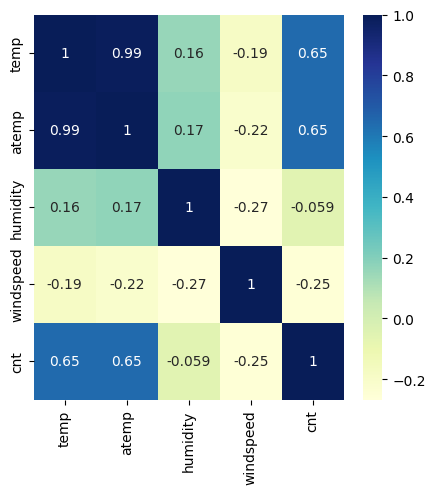

In [150]:
corr_columns = ['temp','atemp','humidity','windspeed','cnt']
plt.figure(figsize = (5, 5))
sns.heatmap(df_train[corr_columns].corr(), annot = True, cmap="YlGnBu")
plt.show()

Inference

1. Seems temp & atemp has highest correlation among them. i.e Multicollinearity prevails between them. Hence we can drop 1 column out of those.
2. There is no correlation between Humidity & cnt at all.

Spliting Train - Dependent vs Independent Variables

In [151]:
# Dividing X & Y sets for modelling 
y_train = df_train.pop('cnt')
X_train = df_train

### Identifying the Features through RFE - Recursive Feature Elimination

In [177]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=12)
rfe = rfe.fit(X_train, y_train.values)

In [178]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 4),
 ('Winter', False, 3),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 7),
 ('Feb', False, 8),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 16),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 6),
 ('Oct', False, 17),
 ('Sept', False, 2),
 ('Mon', False, 12),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 13),
 ('Wed', False, 15)]

In [154]:
# Collecting the dataframes with columns rfe.support_ is True
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Spring', 'Winter', 'Light Snow', 'Mist', 'Jul', 'Sept', 'Sat', 'Sun'],
      dtype='object')

In [155]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Model Building Function

In [156]:
def model_build(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm_model = sm.OLS(y_train, X_train_sm).fit()
    print(lm_model.summary())
    return lm_model

#### VIF Values Generating Function

In [157]:
def vif_values(cols):
    vif_df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = vif_df.columns
    vif['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Model 1
Building Models by RFE Selected Variables

In [158]:
# Taking the columns which are selected by RFE 
X_train_rfe = X_train[col]

In [159]:
# Calling the Model Build Function to build models
model_build(X_train_rfe.columns)
vif_values(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          9.38e-190
Time:                        19:53:28   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -372.4334     13.101    -28.429      0.0

#### Inference:- 
1. The p-value of all the features are <0.05, infact they are close to 0, which means that model is significant.
2. But the VIF's value are very High. Hence removing them one by one and analysing the summary of the Model.

## Model 2
Rebuilding Model by Dropping `Workingday` column

In [160]:
X_train_rfe=X_train_rfe.drop('workingday', axis=1)

# Calling the Model Build Function to build models
model_build(X_train_rfe.columns)
vif_values(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          9.38e-190
Time:                        19:53:28   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -465.5079     16.376    -28.426      0.0

### Inference :-
1. Removing the workday column decreases the VIF of all the High valued features which we saw in Model 1. 
2. But p-value of "Sat" Feature increased from 0 to 0.387. Since as per our logic, we have to remove High p-value and then analyse High VIF, removing the "Sat" column and then building model again.

## Model 3 
Rebuilding Model by Dropping `Sat` column

In [161]:
X_train_rfe=X_train_rfe.drop('Sat', axis=1)

# Calling the Model Build Function to build models
model_build(X_train_rfe.columns)
vif_values(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.9
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          8.95e-191
Time:                        19:53:29   Log-Likelihood:                 510.52
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -465.0148     16.362    -28.421      0.0

### Inference :-
1. Removing the "Sat" column did not create much impact in VIF. 
2. But all the p-values are now almost 0. Hence we tried removing the Highest VIF "year" feature and rebuilding the model again. 
3. When I removed "year" feature, the R-squared it dropped from 0.843 to 0.573. 
4. Hence removing the next feature "temp" which has the 2nd highest VIF.

## Model 4
Rebuilding Model by Dropping `humidity` column

In [162]:
X_train_rfe=X_train_rfe.drop('humidity', axis=1)

# Calling the Model Build Function to build models
model_build(X_train_rfe.columns)
vif_values(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          1.32e-188
Time:                        19:53:29   Log-Likelihood:                 502.54
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -930.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -472.2783     16.499    -28.624      0.0

### Inference :- 
1. Now the VIF's are decreased but still way higher than normal value and hence removing the next highest VIF "temp" feature.

## Model 5
Rebuilding Model by Dropping `Humidity` column

In [163]:
X_train_rfe=X_train_rfe.drop('temp', axis=1)

# Calling the Model Build Function to build models
model_build(X_train_rfe.columns)
vif_values(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     162.9
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          3.85e-150
Time:                        19:53:29   Log-Likelihood:                 408.79
No. Observations:                 510   AIC:                            -795.6
Df Residuals:                     499   BIC:                            -749.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.1055     19.690    -25.348      0.0

## Model 6
Rebuilding Model by Dropping `Windspeed` column

In [164]:
X_train_rfe=X_train_rfe.drop('windspeed', axis=1)

# Calling the Model Build Function to build models
model_build(X_train_rfe.columns)
vif_values(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     164.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.30e-143
Time:                        19:53:29   Log-Likelihood:                 390.11
No. Observations:                 510   AIC:                            -760.2
Df Residuals:                     500   BIC:                            -717.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -497.8990     20.403    -24.403      0.0

## Model 7
Rebuilding Model by Dropping `July` column

In [165]:
X_train_rfe=X_train_rfe.drop('Jul', axis=1)

# Calling the Model Build Function to build models
model_build(X_train_rfe.columns)
vif_values(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          4.26e-144
Time:                        19:53:29   Log-Likelihood:                 389.13
No. Observations:                 510   AIC:                            -760.3
Df Residuals:                     501   BIC:                            -722.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -497.9055     20.422    -24.381      0.0

## Residual Analysis

In [166]:
lr_model = model_build(X_train_rfe.columns)
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          4.26e-144
Time:                        19:53:29   Log-Likelihood:                 389.13
No. Observations:                 510   AIC:                            -760.3
Df Residuals:                     501   BIC:                            -722.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -497.9055     20.422    -24.381      0.0

576    0.759120
426    0.382500
728    0.426566
482    0.665928
111    0.418942
         ...   
578    0.759120
53     0.228706
350    0.370508
79     0.418942
520    0.665928
Length: 510, dtype: float64

<Axes: ylabel='Density'>

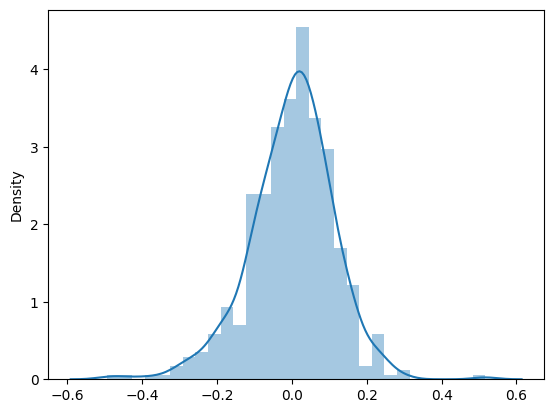

In [167]:
res = y_train - y_train_pred
sns.distplot(res)

### Inference :- 
1. As per our assumption, Residuals follow Normal distribution

## Predictions and Evaluation on Test Set

In [168]:
num_vars = ['temp','atemp', 'humidity','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
184,2018,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,2019,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,2018,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,2018,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,2018,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [169]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2018.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,2018.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
y_test = df_test.pop('cnt')
X_test = df_test

In [171]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,workingday,temp,atemp,humidity,windspeed,Spring,Summer,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
184,1.0,2018,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,2019,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,0,0,1
299,1.0,2018,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,0,1,0,0
221,1.0,2018,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,2018,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,0,0,1,0,0


In [172]:
X_test_sm=X_test_sm[X_train_sm.columns]
X_test_sm.columns

Index(['const', 'year', 'holiday', 'Spring', 'Winter', 'Light Snow', 'Mist',
       'Sept', 'Sun'],
      dtype='object')

In [173]:
y_test_pred = lr_model.predict(X_test_sm)

In [174]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7493652853819313

We can see the equation of our best fitted line is -

$ cnt = 0.247 \times year - 0.1123 \times holiday - 0.2834 \times spring -0.0484 \times winter - 0.3197 \times lightsnow - 0.0932 \times mist + 0.1029 \times Sept - 0.0491 \times Sun $